In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('fix full.csv')
df.head()

,DHT22 (°C),DHT22 KELEMBABAN(%),DHT11 (°C),DHT11 KELEMBABAN(%),LM35 (°C),LM35 Vout,Suhu Aktual(°C)
0,18.7,92.1,20,72,24.90,249.02,16
1,18.7,92.0,20,72,24.41,244.14,16
2,18.7,92.1,20,72,24.41,244.14,16
3,18.7,92.2,20,72,24.41,244.14,16
4,18.7,92.3,20,72,24.41,244.14,16


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DHT22 (°C)           1224 non-null   float64
 1   DHT22 KELEMBABAN(%)  1224 non-null   float64
 2   DHT11 (°C)           1224 non-null   int64  
 3   DHT11 KELEMBABAN(%)  1224 non-null   int64  
 4   LM35 (°C)            1224 non-null   float64
 5   LM35 Vout            1224 non-null   float64
 6   Suhu Aktual(°C)      1224 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 67.1 KB


In [ ]:
df = df.drop(columns =['LM35 Vout'])

In [ ]:
df.head()

,DHT22 (°C),DHT22 KELEMBABAN(%),DHT11 (°C),DHT11 KELEMBABAN(%),LM35 (°C),Suhu Aktual(°C)
0,18.7,92.1,20,72,24.90,16
1,18.7,92.0,20,72,24.41,16
2,18.7,92.1,20,72,24.41,16
3,18.7,92.2,20,72,24.41,16
4,18.7,92.3,20,72,24.41,16


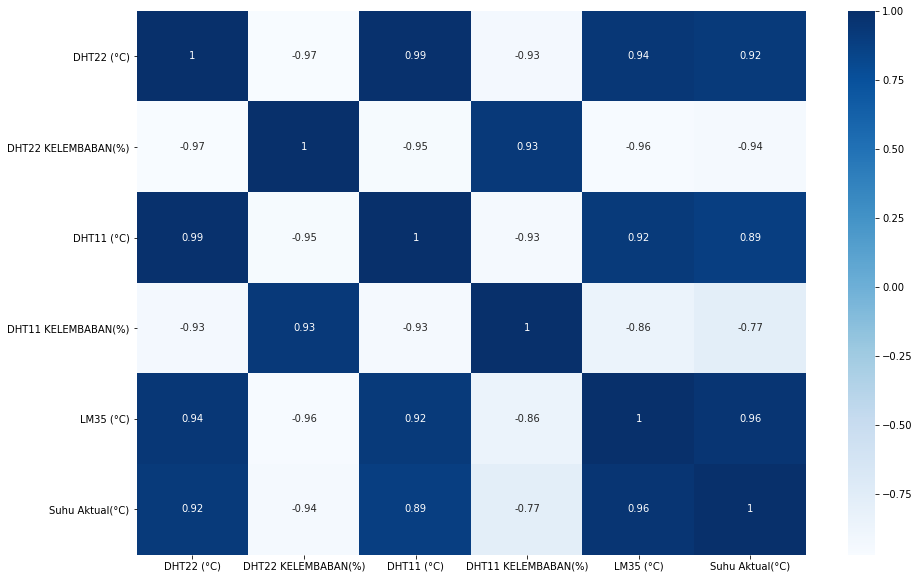

In [ ]:
corr = df.corr()

plt.figure(figsize = (15,10))
corr_h = sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot = True, cmap ='Blues')
plt.savefig('corr_h.png', dpi = 400)

In [ ]:
X = df.iloc[:,0:5]

In [ ]:
X.head()

,DHT22 (°C),DHT22 KELEMBABAN(%),DHT11 (°C),DHT11 KELEMBABAN(%),LM35 (°C)
0,18.7,92.1,20,72,24.90
1,18.7,92.0,20,72,24.41
2,18.7,92.1,20,72,24.41
3,18.7,92.2,20,72,24.41
4,18.7,92.3,20,72,24.41


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaledX = scaler.fit_transform(X)
df['ScaledL'] = scaledX[:,4]
df['ScaledD22'] = scaledX[:,0]
df['ScaledD11'] = scaledX[:,2]
df['ScaledKD11'] = scaledX[:,3]
df['ScaledKD22'] = scaledX[:,1]

In [ ]:
df.head()

,DHT22 (°C),DHT22 KELEMBABAN(%),DHT11 (°C),DHT11 KELEMBABAN(%),LM35 (°C),Suhu Aktual(°C),ScaledL,ScaledD22,ScaledD11,ScaledKD11,ScaledKD22
0,18.7,92.1,20,72,24.90,16,-1.378956,-1.581595,-1.430925,0.579381,1.228920
1,18.7,92.0,20,72,24.41,16,-1.494026,-1.581595,-1.430925,0.579381,1.223552
2,18.7,92.1,20,72,24.41,16,-1.494026,-1.581595,-1.430925,0.579381,1.228920
3,18.7,92.2,20,72,24.41,16,-1.494026,-1.581595,-1.430925,0.579381,1.234289
4,18.7,92.3,20,72,24.41,16,-1.494026,-1.581595,-1.430925,0.579381,1.239658


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DHT22 (°C)           1224 non-null   float64
 1   DHT22 KELEMBABAN(%)  1224 non-null   float64
 2   DHT11 (°C)           1224 non-null   int64  
 3   DHT11 KELEMBABAN(%)  1224 non-null   int64  
 4   LM35 (°C)            1224 non-null   float64
 5   Suhu Aktual(°C)      1224 non-null   int64  
 6   ScaledL              1224 non-null   float64
 7   ScaledD22            1224 non-null   float64
 8   ScaledD11            1224 non-null   float64
 9   ScaledKD11           1224 non-null   float64
 10  ScaledKD22           1224 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 105.3 KB


In [ ]:
Y = df['Suhu Aktual(°C)']

In [ ]:
Y.head()

0    16
1    16
2    16
3    16
4    16
Name: Suhu Aktual(°C), dtype: int64

In [ ]:
rang = 23/len(Y)
x = np.arange(16,39,rang)

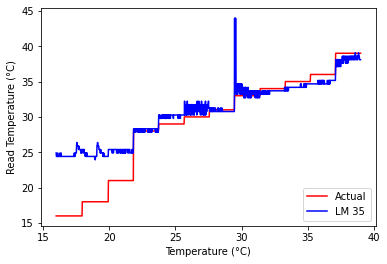

In [ ]:
plt.plot(x, Y,  'r') #Actual temperature
plt.plot(x,X['LM35 (°C)'], 'r', c= 'blue') #LM35
plt.ylabel('Read Temperature (°C)')
plt.xlabel('Temperature (°C)')
plt.legend(["Actual", "LM 35"], loc ="lower right")
LM35_pict = plt.gcf()
plt.show()
LM35_pict.savefig('LM35 vs Actual.png',dpi = 400)

In [ ]:
from sklearn.metrics import mean_squared_error as mse

In [ ]:
mse(Y,X['LM35 (°C)'])

12.79343227124183

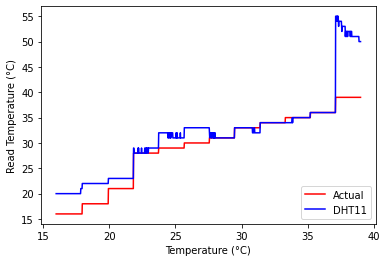

In [ ]:
plt.plot(x, Y,  'r') #Actual temperature
plt.plot(x,X['DHT11 (°C)'], 'r', c= 'blue') #LM35
plt.ylabel('Read Temperature (°C)')
plt.xlabel('Temperature (°C)')
plt.legend(["Actual", "DHT11"], loc ="lower right")
DHT11_pict = plt.gcf()
plt.show()
DHT11_pict.savefig('DHT11 vs Actual.png',dpi = 400)

In [ ]:
mse(Y,X['DHT11 (°C)'])

19.084967320261438

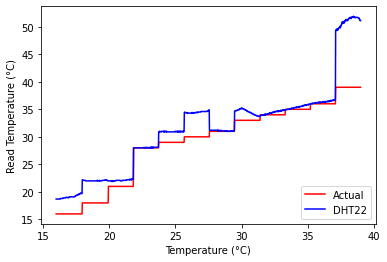

In [ ]:
plt.plot(x, Y,  'r') #Actual temperature
plt.plot(x,X['DHT22 (°C)'], 'r', c= 'blue') #LM35
plt.ylabel('Read Temperature (°C)')
plt.xlabel('Temperature (°C)')
plt.legend(["Actual", "DHT22"], loc ="lower right")
DHT22_pict = plt.gcf()
plt.show()
DHT22_pict.savefig('DHT22 vs Actual.png',dpi = 400)

In [ ]:
mse(Y,X['DHT22 (°C)'])

16.472246732026143

In [ ]:
X_DHT11 = X['DHT11 (°C)']
X_DHT22 = X['DHT22 (°C)']
X_LM35 = X['LM35 (°C)']

In [ ]:
X_DHT11 = X_DHT11.rename_axis('temp')
X_DHT22 = X_DHT22.rename_axis('temp')
X_LM35 = X_LM35.rename_axis('temp')

In [ ]:
X_LM35.head()

temp
0    24.90
1    24.41
2    24.41
3    24.41
4    24.41
Name: LM35 (°C), dtype: float64

In [ ]:
X_DHT11.head()

temp
0    20
1    20
2    20
3    20
4    20
Name: DHT11 (°C), dtype: int64

In [ ]:
X_DHT22.head()

temp
0    18.7
1    18.7
2    18.7
3    18.7
4    18.7
Name: DHT22 (°C), dtype: float64

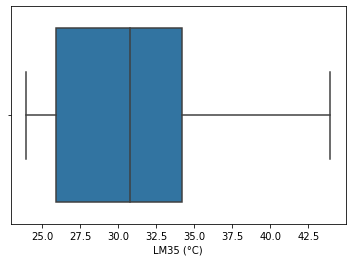

In [ ]:
sns.boxplot(x=X_LM35)

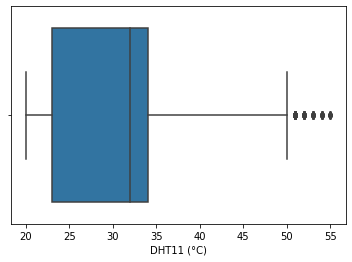

In [ ]:
sns.boxplot(x=X_DHT11)

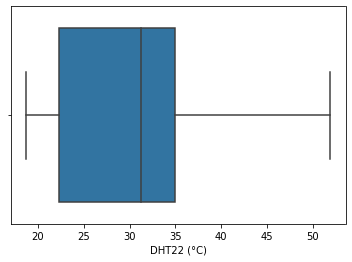

In [ ]:
sns.boxplot(x=X_DHT22)

In [ ]:
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [ ]:
outliers=[]
outLM = detect_outlier(X_LM35)
outLM

[43.95, 43.95, 43.95]

In [ ]:
outliers=[]
outDHT22 = detect_outlier(X_DHT22)
outDHT22

[]

In [ ]:
outliers=[]
outDHT11 = detect_outlier(X_DHT11)
outDHT11

[]

In [ ]:
df.drop(index=df[(df['LM35 (°C)'] == 43.95)].index,inplace=True,axis=0)

In [ ]:
df.info

<bound method DataFrame.info of       DHT22 (°C)  DHT22 KELEMBABAN(%)  ...  ScaledKD11  ScaledKD22
0           18.7                 92.1  ...    0.579381    1.228920
1           18.7                 92.0  ...    0.579381    1.223552
2           18.7                 92.1  ...    0.579381    1.228920
3           18.7                 92.2  ...    0.579381    1.234289
4           18.7                 92.3  ...    0.579381    1.239658
...          ...                  ...  ...         ...         ...
1219        51.3                 32.7  ...   -2.589758   -1.960079
1220        51.3                 32.7  ...   -2.589758   -1.960079
1221        51.1                 32.7  ...   -2.589758   -1.960079
1222        51.1                 32.7  ...   -2.589758   -1.960079
1223        51.1                 32.7  ...   -2.589758   -1.960079

[1221 rows x 11 columns]>

In [ ]:
X_DHT11 = df['DHT11 (°C)']
X_DHT22 = df['DHT22 (°C)']
X_LM35 = df['LM35 (°C)']
Y = df['Suhu Aktual(°C)']

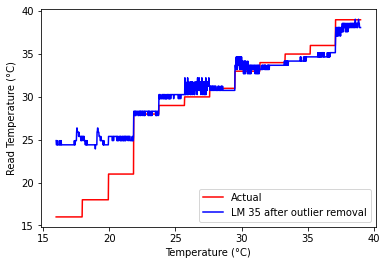

In [ ]:
rang = 23/len(Y)
x = np.arange(16,39,rang)
plt.plot(x, Y,  'r') #Actual temperature
plt.plot(x,X_LM35, 'r', c= 'blue') #LM35
plt.ylabel('Read Temperature (°C)')
plt.xlabel('Temperature (°C)')
plt.legend(["Actual", "LM 35 after outlier removal"], loc ="lower right")
LM35_pict = plt.gcf()
plt.show()
LM35_pict.savefig('LM35 outlier removal vs Actual.png',dpi = 400)

In [ ]:
X_DHT11S = df['ScaledD11']
X_DHT22S = df['ScaledD22']
X_LM35S = df['ScaledL']
X_KDHT11S = df['ScaledKD11']
X_KDHT22S = df['ScaledKD22']

In [ ]:
xscaled = df[['ScaledD11','ScaledD22','ScaledL','ScaledKD11','ScaledKD22','Suhu Aktual(°C)']]
xscaled.iloc[1017,:]

ScaledD11           0.434174
ScaledD22           0.535229
ScaledL             0.915408
ScaledKD11         -0.326087
ScaledKD22         -0.617908
Suhu Aktual(°C)    35.000000
Name: 1020, dtype: float64

In [ ]:
xs = xscaled.iloc[:,0:5]
xs.head()

,ScaledD11,ScaledD22,ScaledL,ScaledKD11,ScaledKD22
0,-1.430925,-1.581595,-1.378956,0.579381,1.228920
1,-1.430925,-1.581595,-1.494026,0.579381,1.223552
2,-1.430925,-1.581595,-1.494026,0.579381,1.228920
3,-1.430925,-1.581595,-1.494026,0.579381,1.234289
4,-1.430925,-1.581595,-1.494026,0.579381,1.239658


In [ ]:
ys = xscaled.iloc[:,5]
ys.head()

0    16
1    16
2    16
3    16
4    16
Name: Suhu Aktual(°C), dtype: int64

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
for train_index, test_index in sss.split(xs, ys):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = xs.iloc[train_index,:], xs.iloc[test_index,:]
  y_train, y_test = ys.iloc[train_index], ys.iloc[test_index]

In [ ]:
xd11 = X_train[['ScaledD11','ScaledKD11']]
xd22 = X_train[['ScaledD22','ScaledKD22']]
xl = X_train['ScaledL']

In [ ]:
xd22.head()

,ScaledD22,ScaledKD22
893,0.387543,-0.451478
529,0.338315,-0.338736
4,-1.581595,1.239658
686,-0.067820,-0.145463
270,-1.163153,1.647678


In [ ]:
y_train.head()

893    34
529    30
4      16
686    31
270    21
Name: Suhu Aktual(°C), dtype: int64

In [ ]:
xtd11 = X_test[['ScaledD11','ScaledKD11']]
xtd22 = X_test[['ScaledD22','ScaledKD22']]
xtl = X_test['ScaledL']

In [ ]:
xtd22.head()

,ScaledD22,ScaledKD22
1017,0.535229,-0.617908
598,0.375236,-0.365579
606,0.375236,-0.360211
160,-1.175460,1.411456
25,-1.569288,1.223552


In [ ]:
xtl.head()

1017    0.915408
598    -0.117877
606     0.227334
160    -1.494026
25     -1.494026
Name: ScaledL, dtype: float64

In [ ]:
y_test.head()

1017    35
598     30
606     30
160     18
25      16
Name: Suhu Aktual(°C), dtype: int64

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
def baseline_model():
# create model
    model = Sequential()
    model.add(Dense(15,input_shape = (2,),kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
def baseline_model_l():
# create model
    model = Sequential()
    model.add(Dense(15,input_shape = (1,),kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
estimator = KerasRegressor(build_fn=baseline_model, epochs=10, batch_size=5, verbose=0)

In [ ]:
estimator_l = KerasRegressor(build_fn=baseline_model_l, epochs=10, batch_size=5, verbose=0)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param = {'epochs':[50,100,200,300,400,500],'batch_size':[5,10,20]}

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
def MSE(y_true,y_pred):
    mse = -(mean_squared_error(y_true, y_pred))
    print ('MSE: %2.3f' % mse)
    return mse

def R2(y_true,y_pred):    
     r2 = r2_score(y_true, y_pred)
     print ('R2: %2.3f' % r2)
     return r2

def two_score(y_true,y_pred):    
    MSE(y_true,y_pred) #set score here and not below if using MSE in GridCV
    score = R2(y_true,y_pred)
    return score

def two_scorer():
    return make_scorer(two_score, greater_is_better=True)

In [ ]:
annrs = GridSearchCV(estimator_l, param,scoring=two_scorer(),n_jobs=-1,cv=10)
annrs.fit(xl,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7f34c8ea50f0>,
             iid='deprecated', n_jobs=-1,
             param_grid={'batch_size': [5, 10, 20],
                         'epochs': [50, 100, 200, 300, 400, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(two_score), verbose=0)

In [ ]:
best_params = annrs.best_params_
model = annrs.best_estimator_
score = annrs.best_score_
print ('%s\tHP\t%s\t%f' % ("R" , str(best_params) ,abs(score)))

R	HP	{'batch_size': 5, 'epochs': 500}	0.962670


In [ ]:
est = KerasRegressor(build_fn=baseline_model_l, epochs=500, batch_size=5, verbose=0)

In [ ]:
est.fit(xl,y_train, batch_size = 5, epochs = 500)

In [ ]:
est.model.save_weights("model lm35 2.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
y_test.sort_values(ascending=True,inplace=True)
y_test

102     16
62      16
91      16
42      16
96      16
        ..
1206    39
1128    39
1202    39
1178    39
1132    39
Name: Suhu Aktual(°C), Length: 367, dtype: int64

In [ ]:
y_pred = est.predict(xtl)

In [ ]:
y_pred_df = pd.DataFrame(data=y_pred,index=xtd11.index)
y_pred_df.head()

,0
1017,35.412464
598,29.628963
606,31.901360
160,17.454868
25,17.454868


In [ ]:
y_pred_df = y_pred_df.loc[y_test.index]
y_pred_df.head()

,0
102,19.649925
62,17.454868
91,20.757629
42,17.454868
96,19.649925


In [ ]:
mse(y_test,y_pred_df.values)

1.8068414170525213

In [ ]:
r2_score(y_test, y_pred_df.values)

0.9637102410769068

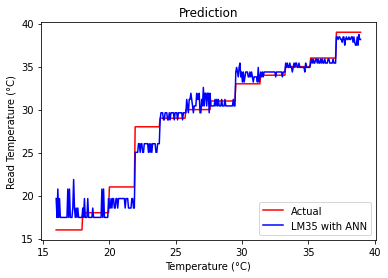

In [ ]:
plt.plot(xt,y_test, color = 'red')
plt.plot(xt,y_pred_df.values, color = 'blue')
plt.title('Prediction')
plt.ylabel('Read Temperature (°C)')
plt.xlabel('Temperature (°C)')
plt.legend(["Actual", "LM35 with ANN"], loc ="lower right")
LM35_ann = plt.gcf()
plt.show()
LM35_ann.savefig('LM35 ANN vs Actual.png',dpi = 400)

In [ ]:
ep = np.arange(50,501,50)
ep

array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500])

In [ ]:
mse_ = []
r2_ = []
for num in ep:
  est.fit(xl,y_train, batch_size = 5, epochs = num)
  y_pred_ = est.predict(xtl)
  y_pred_df_ = pd.DataFrame(data=y_pred_,index=xtd11.index)
  y_pred_df_ = y_pred_df_.loc[y_test.index]
  mse_.append(mse(y_test,y_pred_df_.values))
  r2_.append(r2_score(y_test, y_pred_df_.values))

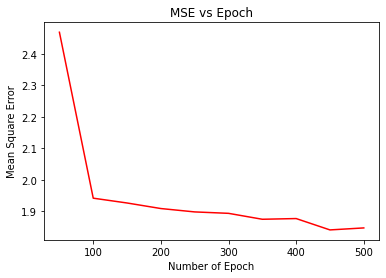

In [ ]:
plt.plot(ep,mse_, color = 'red')
plt.title('MSE vs Epoch')
plt.ylabel('Mean Square Error')
plt.xlabel('Number of Epoch')
LM35_MSE = plt.gcf()
plt.show()
LM35_MSE.savefig('MSE vs Epoch.png',dpi = 400)

In [ ]:
bt = np.arange(5,20,5)
bt

array([ 5, 10, 15])

In [ ]:
mseb_ = []
r2b_ = []
for num in bt:
  est.fit(xl,y_train, batch_size = num, epochs = 500)
  y_pred_ = est.predict(xtl)
  y_pred_df_ = pd.DataFrame(data=y_pred_,index=xtd11.index)
  y_pred_df_ = y_pred_df_.loc[y_test.index]
  mseb_.append(mse(y_test,y_pred_df_.values))
  r2b_.append(r2_score(y_test, y_pred_df_.values))

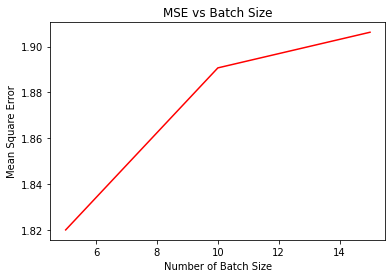

In [ ]:
plt.plot(bt,mseb_, color = 'red')
plt.title('MSE vs Batch Size')
plt.ylabel('Mean Square Error')
plt.xlabel('Number of Batch Size')
LM35_MSE = plt.gcf()
plt.show()
LM35_MSE.savefig('MSE vs Batch LM35.png',dpi = 400)

In [ ]:
annr1 = GridSearchCV(estimator, param,scoring=two_scorer(),n_jobs=-1,cv=10)
annr1.fit(xd22,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7f9242d5e780>,
             iid='deprecated', n_jobs=-1,
             param_grid={'batch_size': [5, 10, 20],
                         'epochs': [50, 100, 200, 300, 400, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(two_score), verbose=0)

In [ ]:
best_params = annr1.best_params_
model = annr1.best_estimator_
score = annr1.best_score_
print ('%s\tHP\t%s\t%f' % ("R" , str(best_params) ,abs(score)))

R	HP	{'batch_size': 5, 'epochs': 500}	0.961990


In [ ]:
est1 = KerasRegressor(build_fn=baseline_model, epochs=500, batch_size=5, verbose=0)

In [ ]:
est1.fit(xd22,y_train, batch_size = 5, epochs = 500)

In [ ]:
est1.model.save_weights("model dht22 2.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
y_pred1 = est1.predict(xtd22)

In [ ]:
y_pred1_df = pd.DataFrame(data=y_pred1,index=xtd11.index)

In [ ]:
y_pred1_df = y_pred1_df.loc[y_test.index]

In [ ]:
y_pred1_df

,0
102,16.826632
62,15.983195
91,16.674475
42,15.831119
96,16.823013
...,...
1206,39.229099
1128,38.977428
1202,39.229099
1178,39.217922


In [ ]:
rang = 23/len(y_test)
xt = np.arange(16,39,rang)

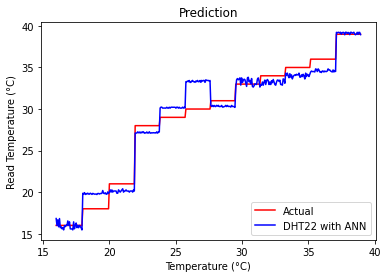

In [ ]:
plt.plot(xt,y_test, color = 'red')
plt.plot(xt,y_pred1_df.values, color = 'blue')
plt.title('Prediction')
plt.ylabel('Read Temperature (°C)')
plt.xlabel('Temperature (°C)')
plt.legend(["Actual", "DHT22 with ANN"], loc ="lower right")
LM35_ann = plt.gcf()
plt.show()
LM35_ann.savefig('DHT22 ANN vs Actual.png',dpi = 400)

In [ ]:
mse(y_test,y_pred1_df.values)

1.828293595190764

In [ ]:
r2_score(y_test,y_pred1_df.values)

0.9632793818074299

In [ ]:
mse1_ = []
r21_ = []
for num in ep:
  est1.fit(xd22,y_train, batch_size = 5, epochs = num)
  y_pred_ = est1.predict(xtd22)
  y_pred_df_ = pd.DataFrame(data=y_pred_,index=xtd11.index)
  y_pred_df_ = y_pred_df_.loc[y_test.index]
  mse1_.append(mse(y_test,y_pred_df_.values))
  r21_.append(r2_score(y_test, y_pred_df_.values))

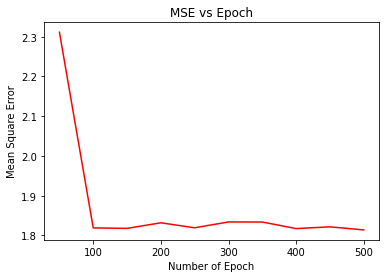

In [ ]:
plt.plot(ep,mse1_, color = 'red')
plt.title('MSE vs Epoch')
plt.ylabel('Mean Square Error')
plt.xlabel('Number of Epoch')
LM35_MSE = plt.gcf()
plt.show()
LM35_MSE.savefig('MSE vs Epoch DHT22.png',dpi = 400)

In [ ]:
mse1b_ = []
r21b_ = []
for num in bt:
  est1.fit(xd22,y_train, batch_size = num, epochs = 500)
  y_pred_ = est1.predict(xtd22)
  y_pred_df_ = pd.DataFrame(data=y_pred_,index=xtd11.index)
  y_pred_df_ = y_pred_df_.loc[y_test.index]
  mse1b_.append(mse(y_test,y_pred_df_.values))
  r21b_.append(r2_score(y_test, y_pred_df_.values))

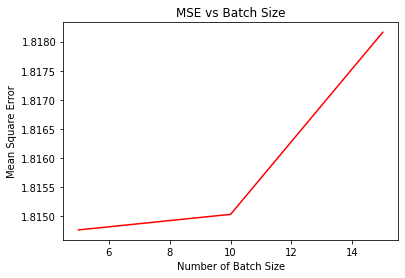

In [ ]:
plt.plot(bt,mse1b_, color = 'red')
plt.title('MSE vs Batch Size')
plt.ylabel('Mean Square Error')
plt.xlabel('Number of Batch Size')
LM35_MSE = plt.gcf()
plt.show()
LM35_MSE.savefig('MSE vs Batch DHT22.png',dpi = 400)

In [ ]:
annr2 = GridSearchCV(estimator, param,scoring=two_scorer(),n_jobs=-1,cv=10)
annr2.fit(xd11,y_train)

In [ ]:
best_params = annr2.best_params_
model = annr2.best_estimator_
score = annr2.best_score_
print ('%s\tHP\t%s\t%f' % ("R" , str(best_params) ,abs(score)))

R	HP	{'batch_size': 5, 'epochs': 500}	0.988503


In [ ]:
est2 = KerasRegressor(build_fn=baseline_model, epochs=500, batch_size=5, verbose=0)

In [ ]:
est2.fit(xd11,y_train, batch_size = 5, epochs = 500)

In [ ]:
est2.model.save_weights("model dht11 2.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
y_pred2 = est2.predict(xtd11)

In [ ]:
y_pred2_df = pd.DataFrame(data=y_pred2,index=xtd11.index)

In [ ]:
y_pred2_df=y_pred2_df.loc[y_test.index]

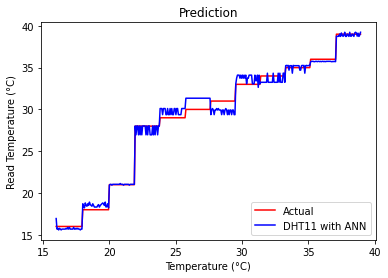

In [ ]:
plt.plot(xt,y_test, color = 'red')
plt.plot(xt,y_pred2_df.values, color = 'blue')
plt.title('Prediction')
plt.ylabel('Read Temperature (°C)')
plt.xlabel('Temperature (°C)')
plt.legend(["Actual", "DHT11 with ANN"], loc ="lower right")
LM35_ann = plt.gcf()
plt.show()
LM35_ann.savefig('DHT11 ANN vs Actual.png',dpi = 400)

In [ ]:
mse(y_test,y_pred2_df.values)

0.5266122998046128

In [ ]:
r2_score(y_test,y_pred2_df.values)

0.9894231816774379

In [ ]:
mse2_ = []
r22_ = []
for num in ep:
  est2.fit(xd11,y_train, batch_size = 5, epochs = num)
  y_pred_ = est2.predict(xtd11)
  y_pred_df_ = pd.DataFrame(data=y_pred_,index=xtd11.index)
  y_pred_df_ = y_pred_df_.loc[y_test.index]
  mse2_.append(mse(y_test,y_pred_df_.values))
  r22_.append(r2_score(y_test, y_pred_df_.values))

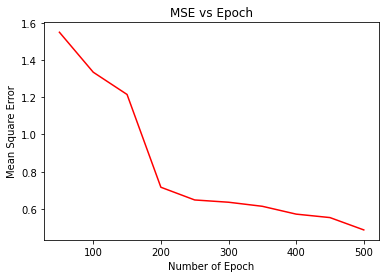

In [ ]:
plt.plot(ep,mse2_, color = 'red')
plt.title('MSE vs Epoch')
plt.ylabel('Mean Square Error')
plt.xlabel('Number of Epoch')
LM35_MSE = plt.gcf()
plt.show()
LM35_MSE.savefig('MSE vs Epoch DHT11.png',dpi = 400)

In [ ]:
mse2b_ = []
r22b_ = []
for num in bt:
  est2.fit(xd11,y_train, batch_size = num, epochs = 500)
  y_pred_ = est2.predict(xtd11)
  y_pred_df_ = pd.DataFrame(data=y_pred_,index=xtd11.index)
  y_pred_df_ = y_pred_df_.loc[y_test.index]
  mse2b_.append(mse(y_test,y_pred_df_.values))
  r22b_.append(r2_score(y_test, y_pred_df_.values))

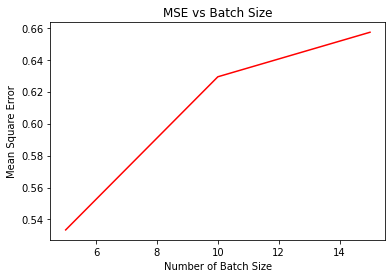

In [ ]:
plt.plot(bt,mse2b_, color = 'red')
plt.title('MSE vs Batch Size')
plt.ylabel('Mean Square Error')
plt.xlabel('Number of Batch Size')
LM35_MSE = plt.gcf()
plt.show()
LM35_MSE.savefig('MSE vs Batch DHT11.png',dpi = 400)

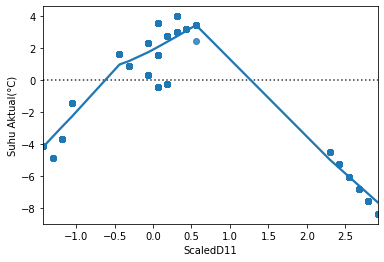

In [ ]:
sns.residplot(x=X_DHT11S,y=Y,lowess=True)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score 
degrees = [2, 3, 4, 5, 6, 7, 8, 9] # Change degree "hyperparameter" here
normalizes = [True, False] # Change normalize hyperparameter here
best_score = 0
best_degree = 0
for degree in degrees:
    for normalize in normalizes:
        poly_features = PolynomialFeatures(degree = degree)
        X_train_poly = poly_features.fit_transform(np.array(xd11))
        polynomial_regressor = LinearRegression(normalize=normalize)
        polynomial_regressor.fit(X_train_poly, y_train)
        scores = cross_val_score(polynomial_regressor, X_train_poly, y_train, cv=10, scoring=two_scorer()) # Change k-fold cv value here
        if max(scores) > best_score:
            best_score = max(scores)
            best_degree = degree
            best_normalize = normalize

In [ ]:
print(best_score,' ',best_degree,' ',best_normalize)

0.9985119985352048   9   True


In [ ]:
pfl = PolynomialFeatures(degree = 9)
XLMpoly = pfl.fit_transform(np.array(xd11).reshape(-1, 1))
preg = LinearRegression(normalize=True)
preg.fit(np.array(xd11), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
ypred = preg.predict(np.array(xtd11))

In [ ]:
ypred_df = pd.DataFrame(data=ypred,index=xtd11.index)

In [ ]:
ypred_df=ypred_df.loc[y_test.index]

In [ ]:
mse(y_test,ypred_df.values)

8.487708777445011

In [ ]:
r2_score(y_test,ypred_df.values)

0.8295274270138411

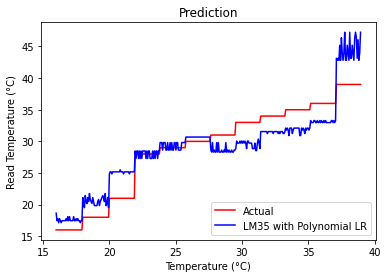

In [ ]:
plt.plot(xt,y_test, color = 'red')
plt.plot(xt,ypred_df.values, color = 'blue')
plt.title('Prediction')
plt.ylabel('Read Temperature (°C)')
plt.xlabel('Temperature (°C)')
plt.legend(["Actual", "LM35 with Polynomial LR"], loc ="lower right")
LM35_ann = plt.gcf()
plt.show()
LM35_ann.savefig('LM35 PLR vs Actual.png',dpi = 400)